In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb

In [11]:
disburse_df = pd.read_csv('2021Q3-house-disburse-detail.csv')
disburse_df

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
0,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2021-08-03,AP,1448486,CAPITOL HOST,2021-07-19,2021-07-19,FOOD & BEVERAGE,298.58,2021
1,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2021-08-03,AP,1448487,CAPITOL HOST,2021-07-20,2021-07-20,FOOD & BEVERAGE,124.83,2021
2,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2021-08-03,AP,1448488,CAPITOL HOST,2021-07-20,2021-07-20,FOOD & BEVERAGE,259.38,2021
3,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,SUBTOTAL,,,,,,,SUPPLIES AND MATERIALS TOTALS:,682.79,2021
4,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,SUBTOTAL,,,,,,,OFFICIAL EXPENSES - LEADERSHIP TOTALS:,682.79,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105289,NaN,FISCAL YEAR 2020 PAGING,3,PAGING,EQUIPMENT,DETAIL,2021-08-18,AP,1457703,BEARCOM,2021-08-01,2021-08-31,WARRANTIES,6405.41,2021
105290,NaN,FISCAL YEAR 2020 PAGING,3,PAGING,EQUIPMENT,DETAIL,2021-09-15,AP,1465040,BEARCOM,2021-09-01,2021-09-30,WARRANTIES,6405.41,2021
105291,NaN,FISCAL YEAR 2020 PAGING,3,PAGING,EQUIPMENT,SUBTOTAL,,,,,,,EQUIPMENT TOTALS:,19216.23,2021
105292,NaN,FISCAL YEAR 2020 PAGING,3,PAGING,EQUIPMENT,SUBTOTAL,,,,,,,PAGING TOTALS:,19216.23,2021


In [12]:
disburse_df.shape

(105294, 15)

In [18]:
disburse_df['BIOGUIDE_ID']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
105289    NaN
105290    NaN
105291    NaN
105292    NaN
105293    NaN
Name: BIOGUIDE_ID, Length: 105294, dtype: object

In [22]:
members_df = pd.read_csv('house_members.csv')
members_df.head()

,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,"Young, Don",Y000033,Young,Don,NaN,"YOUNG,DON",NaN,Mr.,116,Don Young,Mr. Young,R,R,NaN,At Large,Fort Yukon,RHOB,2314,20515,200,(202) 225-5765,"November 3, 2020","January 3, 2021",NaN,NaN,AK,Alaska,AK00
1,"Carl, Jerry",C001054,Carl,Jerry,L.,"CARL,JERRY",NaN,Mr.,0,Jerry L. Carl,Mr. Carl,R,R,NaN,1st,Mobile,LHOB,1330,20515,101,(202) 225-4931,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL01
2,"Moore, Barry",M001212,Moore,Barry,NaN,"MOORE,BARRY",NaN,Mr.,0,Barry Moore,Mr. Moore of Alabama,R,R,NaN,2nd,Enterprise,LHOB,1504,20515,102,(202) 225-2901,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL02
3,"Rogers, Mike",R000575,Rogers,Mike,NaN,"ROGERS,MIKE",NaN,Mr.,116,Mike Rogers,Mr. Rogers of Alabama,R,R,NaN,3rd,Anniston,RHOB,2469,20515,103,(202) 225-3261,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL03
4,"Aderholt, Robert",A000055,Aderholt,Robert,B.,"ADERHOLT,ROBERT",NaN,Mr.,116,Robert B. Aderholt,Mr. Aderholt,R,R,NaN,4th,Haleyville,CHOB,266,20515,104,(202) 225-4876,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL04


In [23]:
# Define my conditions first
c0 = disburse_df['SORT SEQUENCE'] == 'DETAIL'
c1 = disburse_df['BIOGUIDE_ID'].notnull()

# Then pass to boolean index
house_21q3_clean_df = disburse_df[c0 & c1]

house_21q3_clean_df.head()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
7126,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-07-31,GL,FLG0108342,,2021-07-20,2021-07-31,FRANKED MAIL,-22.20,2021
7127,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-08-10,AP,1448678,UNITED STATES POSTAL SERVICE,2021-06-01,2021-06-30,FRANKED MAIL,346.61,2021
7128,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-01,AP,1460065,UNITED STATES POSTAL SERVICE,2021-07-01,2021-07-31,FRANKED MAIL,31.89,2021
7129,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-28,AP,1470892,UNITED STATES POSTAL SERVICE,2021-08-01,2021-08-31,FRANKED MAIL,24.05,2021
7130,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-30,GL,FLG0109986,,2021-09-20,2021-09-30,FRANKED MAIL,-10.10,2021


In [24]:
joined_df = pd.merge(
    left = house_21q3_clean_df,
    right = members_df,
    left_on = 'BIOGUIDE_ID',
    right_on = 'bioguideID',
    how = 'inner'
)

joined_df.head()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-07-31,GL,FLG0108342,,2021-07-20,2021-07-31,FRANKED MAIL,-22.20,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
1,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-08-10,AP,1448678,UNITED STATES POSTAL SERVICE,2021-06-01,2021-06-30,FRANKED MAIL,346.61,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
2,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-01,AP,1460065,UNITED STATES POSTAL SERVICE,2021-07-01,2021-07-31,FRANKED MAIL,31.89,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
3,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-28,AP,1470892,UNITED STATES POSTAL SERVICE,2021-08-01,2021-08-31,FRANKED MAIL,24.05,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
4,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-30,GL,FLG0109986,,2021-09-20,2021-09-30,FRANKED MAIL,-10.10,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12


In [30]:
joined_df['YEAR']

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
77265    2021
77266    2021
77267    2021
77268    2021
77269    2021
Name: YEAR, Length: 77270, dtype: int64

In [31]:
total_spending = joined_df.groupby('BIOGUIDE_ID').agg({'AMOUNT':'sum'})

spending_joined = pd.merge(
    left = total_spending.reset_index(),
    right = members_df,
    left_on = 'BIOGUIDE_ID',
    right_on = 'bioguideID',
    how = 'left'
)

spending_joined

,BIOGUIDE_ID,AMOUNT,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,A000055,332523.95,"Aderholt, Robert",A000055,Aderholt,Robert,B.,"ADERHOLT,ROBERT",NaN,Mr.,116,Robert B. Aderholt,Mr. Aderholt,R,R,NaN,4th,Haleyville,CHOB,266,20515,104,(202) 225-4876,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL04
1,A000148,299968.98,"Auchincloss, Jake",A000148,Auchincloss,Jake,NaN,"AUCHINCLOSS,JAKE",NaN,Mr.,0,Jake Auchincloss,Mr. Auchincloss,D,D,NaN,4th,Newton,LHOB,1524,20515,2104,(202) 225-5931,"November 3, 2020","January 3, 2021",NaN,NaN,MA,Massachusetts,MA04
2,A000369,275509.57,"Amodei, Mark",A000369,Amodei,Mark,E.,"AMODEI,MARK",NaN,Mr.,116,Mark E. Amodei,Mr. Amodei,R,R,NaN,2nd,Carson City,CHOB,104,20515,2802,(202) 225-6155,"November 3, 2020","January 3, 2021",NaN,NaN,NV,Nevada,NV02
3,A000370,311832.30,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
4,A000371,314503.94,"Aguilar, Pete",A000371,Aguilar,Pete,NaN,"AGUILAR,PETE",NaN,Mr.,116,Pete Aguilar,Mr. Aguilar,D,D,NaN,31st,Redlands,CHOB,109,20515,531,(202) 225-3201,"November 3, 2020","January 3, 2021",NaN,NaN,CA,California,CA31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,W000825,310593.50,"Wexton, Jennifer",W000825,Wexton,Jennifer,NaN,"WEXTON,JENNIFER",NaN,Ms.,116,Jennifer Wexton,Ms. Wexton,D,D,NaN,10th,Leesburg,LHOB,1217,20515,4610,(202) 225-5136,"November 3, 2020","January 3, 2021",NaN,NaN,VA,Virginia,VA10
429,W000826,305119.34,"Wild, Susan",W000826,Wild,Susan,NaN,"WILD,SUSAN",NaN,Ms.,116,Susan Wild,Ms. Wild,D,D,NaN,7th,Allentown,LHOB,1027,20515,3807,(202) 225-6411,"November 3, 2020","January 3, 2021",NaN,NaN,PA,Pennsylvania,PA07
430,Y000033,323914.61,"Young, Don",Y000033,Young,Don,NaN,"YOUNG,DON",NaN,Mr.,116,Don Young,Mr. Young,R,R,NaN,At Large,Fort Yukon,RHOB,2314,20515,200,(202) 225-5765,"November 3, 2020","January 3, 2021",NaN,NaN,AK,Alaska,AK00
431,Y000062,323923.51,"Yarmuth, John",Y000062,Yarmuth,John,A.,"YARMUTH,JOHN",NaN,Mr.,116,John A. Yarmuth,Mr. Yarmuth,D,D,NaN,3rd,Louisville,CHOB,402,20515,1703,(202) 225-5401,"November 3, 2020","January 3, 2021",NaN,NaN,KY,Kentucky,KY03


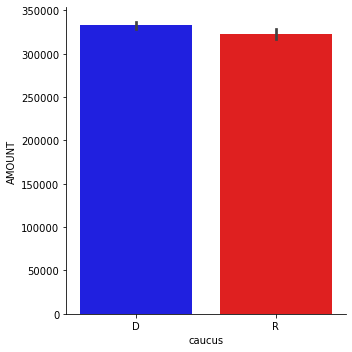

In [65]:
sb.catplot(
    data = spending_joined,
    x = 'caucus',
    y = 'AMOUNT',
    kind = 'bar',
    order = ['D','R'],
    palette = sb.color_palette(['blue','red'])
)

<AxesSubplot:xlabel='caucus', ylabel='AMOUNT'>

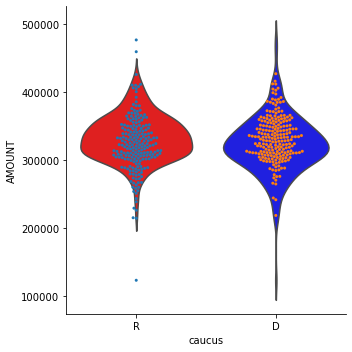

In [64]:
sb.catplot(
    data = spending_joined,
    x = 'caucus',
    y = 'AMOUNT',
    kind = 'violin',
    order = ['D','R'],
    palette = sb.color_palette(['red','blue']),
    inner = None
)

sb.swarmplot(
    data = spending_joined,
    x = 'caucus',
    y = 'AMOUNT',
    size = 3
)

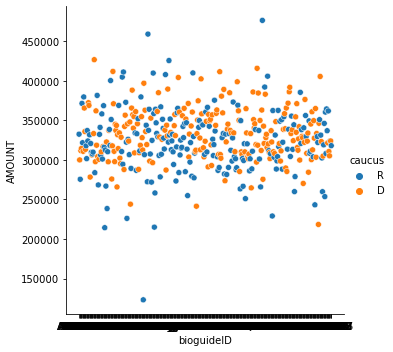

In [57]:
sb.relplot(
    data = spending_joined,
    x = 'bioguideID', 
    y = 'AMOUNT',
    hue = 'caucus',
    
)

Which party spends the most money and why. Plot/line graph of the data. Tie in recent events.